In [23]:
#This will be the data analytics code

In [24]:
#Run if not downloaded already
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn

You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.6/libexec/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.6/libexec/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.6/libexec/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.6/libexec/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.6/libexec/bin/python3.8 -m pip install --upgrade pip' command.


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import partial, reduce 
from sklearn.model_selection import train_test_split
# For either K Nearest Neighbor or K Mean Clustering, I don't know which to use yet
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

#Load all the data into seperate data frames

# GDP
gdp_df = pd.read_csv("../clean_gdp_capita.csv", encoding="ISO-8859-1", index_col=0)
a = gdp_df.columns[3:]
gdp_df = pd.melt(gdp_df, id_vars=['Country.Name', 'Region', 'IncomeGroup'], value_vars=a,
        var_name='Year', value_name='GDP').sort_values(['Country.Name','Year']).reset_index()
gdp_df.drop('index', inplace=True, axis=1)
gdp_df.head()

,Country.Name,Region,IncomeGroup,Year,GDP
0,Afghanistan,South Asia,Low income,1960,59.773194
1,Afghanistan,South Asia,Low income,1961,59.860874
2,Afghanistan,South Asia,Low income,1962,58.458015
3,Afghanistan,South Asia,Low income,1963,78.706388
4,Afghanistan,South Asia,Low income,1964,82.095231


In [26]:
# GINI_Index
gini_df = pd.read_csv("../clean_gini_index.csv", encoding="ISO-8859-1", index_col=0)
a = gini_df.columns[3:]
gini_df = pd.melt(gini_df, id_vars=['Country.Name', 'Region', 'IncomeGroup'], value_vars=a,
        var_name='Year', value_name='Gini Index').sort_values(['Country.Name','Year']).reset_index()
gini_df.drop('index', inplace=True, axis=1)
gini_df.head()

,Country.Name,Region,IncomeGroup,Year,Gini Index
0,Afghanistan,South Asia,Low income,1960,NaN
1,Afghanistan,South Asia,Low income,1961,NaN
2,Afghanistan,South Asia,Low income,1962,NaN
3,Afghanistan,South Asia,Low income,1963,NaN
4,Afghanistan,South Asia,Low income,1964,NaN


In [27]:
# Literacy Rate
literacy_df = pd.read_csv("../clean_literacy_rate.csv", encoding="ISO-8859-1", index_col=0)
a = literacy_df.columns[3:]
literacy_df = pd.melt(literacy_df, id_vars=['Country.Name', 'Region', 'IncomeGroup'], value_vars=a,
        var_name='Year', value_name='Literacy Rate').sort_values(['Country.Name','Year']).reset_index()
literacy_df.drop('index', inplace=True, axis=1)
literacy_df.head()

,Country.Name,Region,IncomeGroup,Year,Literacy Rate
0,Afghanistan,South Asia,Low income,1960,18.157681
1,Afghanistan,South Asia,Low income,1961,18.157681
2,Afghanistan,South Asia,Low income,1962,18.157681
3,Afghanistan,South Asia,Low income,1963,18.157681
4,Afghanistan,South Asia,Low income,1964,18.157681


In [28]:
# Secondary School Enrollment 
second_school_df = pd.read_csv("../clean_school_enrol_sec.csv", encoding="ISO-8859-1", index_col=0)
a = second_school_df.columns[3:]
second_school_df = pd.melt(second_school_df, id_vars=['Country.Name', 'Region', 'IncomeGroup'], value_vars=a,
        var_name='Year', value_name='Secondary School Enrollment').sort_values(['Country.Name','Year']).reset_index()
second_school_df.drop('index', inplace=True, axis=1)
second_school_df.head()

,Country.Name,Region,IncomeGroup,Year,Secondary School Enrollment
0,Afghanistan,South Asia,Low income,1960,8.30642
1,Afghanistan,South Asia,Low income,1961,8.30642
2,Afghanistan,South Asia,Low income,1962,8.30642
3,Afghanistan,South Asia,Low income,1963,8.30642
4,Afghanistan,South Asia,Low income,1964,8.30642


In [29]:
# Tertiary School Enrollment 
third_school_df = pd.read_csv("../clean_school_enrol_tert.csv", encoding="ISO-8859-1", index_col=0)
a = third_school_df.columns[3:]
third_school_df = pd.melt(third_school_df, id_vars=['Country.Name', 'Region', 'IncomeGroup'], value_vars=a,
        var_name='Year', value_name='Tertinary School Enrollment').sort_values(['Country.Name','Year']).reset_index()
third_school_df.drop('index', inplace=True, axis=1)
third_school_df.head()

,Country.Name,Region,IncomeGroup,Year,Tertinary School Enrollment
0,Afghanistan,South Asia,Low income,1960,0.76877
1,Afghanistan,South Asia,Low income,1961,0.76877
2,Afghanistan,South Asia,Low income,1962,0.76877
3,Afghanistan,South Asia,Low income,1963,0.76877
4,Afghanistan,South Asia,Low income,1964,0.76877


In [30]:
# Poverty Head
poverty_df = pd.read_csv("../clean_poverty_head.csv", encoding="ISO-8859-1", index_col=0)
a = poverty_df.columns[3:]
poverty_df = pd.melt(poverty_df, id_vars=['Country.Name', 'Region', 'IncomeGroup'], value_vars=a,
        var_name='Year', value_name='Poverty Rate').sort_values(['Country.Name','Year']).reset_index()
poverty_df.drop('index', inplace=True, axis=1)

In [31]:
# Merge dataframes
dfs = [gdp_df, gini_df, literacy_df, second_school_df, third_school_df, poverty_df]
final_df = reduce(lambda x,y: pd.merge(x,y, on=['Country.Name', 'Region', 'IncomeGroup', 'Year'], how='outer'), dfs)


In [32]:
# Only use the results for actual data
final_df.dropna(subset=['Poverty Rate','GDP','Gini Index', 'Literacy Rate', 'Secondary School Enrollment'
                        ,'Tertinary School Enrollment'], inplace=True)
final_df.index.name = 'Index'
final_df

,Country.Name,Region,IncomeGroup,Year,GDP,Gini Index,Literacy Rate,Secondary School Enrollment,Tertinary School Enrollment,Poverty Rate
Index,,,,,,,,,,
61,Albania,Europe & Central Asia,Upper middle income,1960,639.484736,27.000000,98.712982,84.974258,13.90814,0.900000
62,Albania,Europe & Central Asia,Upper middle income,1961,639.484736,27.000000,98.712982,84.974258,13.90814,0.900000
63,Albania,Europe & Central Asia,Upper middle income,1962,639.484736,27.000000,98.712982,84.974258,13.90814,0.900000
64,Albania,Europe & Central Asia,Upper middle income,1963,639.484736,27.000000,98.712982,84.974258,13.90814,0.900000
65,Albania,Europe & Central Asia,Upper middle income,1964,639.484736,27.000000,98.712982,84.974258,13.90814,0.900000
...,...,...,...,...,...,...,...,...,...,...
16038,Zimbabwe,Sub-Saharan Africa,Lower middle income,2016,1464.583529,44.116667,88.693420,52.405670,10.00655,31.816667
16039,Zimbabwe,Sub-Saharan Africa,Lower middle income,2017,1548.170056,44.300000,88.693420,52.405670,10.00655,33.900000
16040,Zimbabwe,Sub-Saharan Africa,Lower middle income,2018,1683.740577,44.300000,88.693420,52.405670,10.00655,33.900000


In [33]:
# Create label for our result and seperate into train and test
# for maching learning if we want to create more models
y = final_df['Poverty Rate']
final_df.drop(['Poverty Rate'], axis=1, inplace = True)
X = final_df.select_dtypes(exclude=['object'])
for i in y.index:
    if y.at[i] >= 75:
        y.at[i] = 3
    elif y.at[i] >= 50 and y.at[i] < 75 :
        y.at[i] = 2
    elif y.at[i] >= 25 and y.at[i] < 50 :
        y.at[i] = 1
    else:
        y.at[i] = 0

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = .75, test_size = 0.25 , random_state = 0)

In [34]:
from sklearn.preprocessing import MinMaxScaler
# Scale each feature
ms = MinMaxScaler()
cols = X.columns
X_cluster = ms.fit_transform(X)
X_cluster = pd.DataFrame(X_cluster, columns=cols)
X_cluster.head()

,GDP,Gini Index,Literacy Rate,Secondary School Enrollment,Tertinary School Enrollment
0,0.014776,0.078385,0.985939,0.598228,0.09736
1,0.014776,0.078385,0.985939,0.598228,0.09736
2,0.014776,0.078385,0.985939,0.598228,0.09736
3,0.014776,0.078385,0.985939,0.598228,0.09736
4,0.014776,0.078385,0.985939,0.598228,0.09736


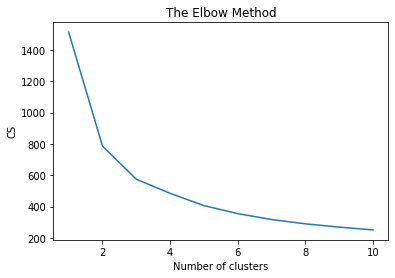

In [35]:
# Using the elbow method to determine how many clusters
cs = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_cluster)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()
    

In [36]:
# Actual Clustering
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(X_cluster)
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

y_kmeans = kmeans.fit_predict(X_cluster)

Result: 4376 out of 7452 samples were correctly labeled.
Accuracy score: 0.59


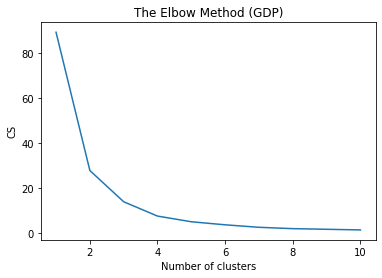

In [37]:
#Elbow method GDP
cs = []
X_GDP = X_cluster.loc[:,'GDP'].values
X_GDP = np.reshape(X_GDP, (-1,1))
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_GDP)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method (GDP)')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [38]:
# Actual Clustering GDP
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(X_GDP)
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

y_kmeans_GDP = kmeans.fit_predict(X_GDP)

Result: 4085 out of 7452 samples were correctly labeled.
Accuracy score: 0.55


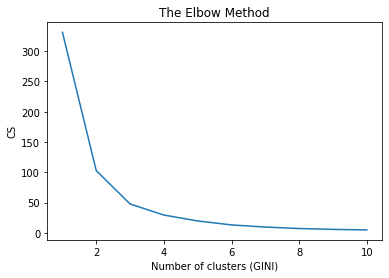

In [39]:
#Elbow method Gini
cs = []
X_Gini = X_cluster.loc[:,'Gini Index'].values
X_Gini = np.reshape(X_Gini, (-1,1))
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_Gini)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters (GINI)')
plt.ylabel('CS')
plt.show()

In [40]:
# Actual Clustering Gini
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(X_Gini)
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

y_kmeans_GINI = kmeans.fit_predict(X_Gini)

Result: 1751 out of 7452 samples were correctly labeled.
Accuracy score: 0.23


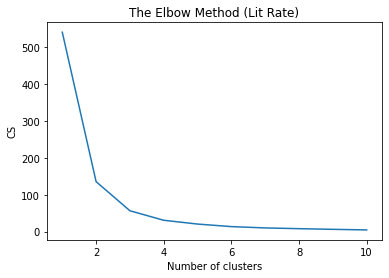

In [41]:
#Elbow method Literacy Rate
cs = []
X_Lit = X_cluster.loc[:,'Literacy Rate'].values
X_Lit = np.reshape(X_Lit, (-1,1))
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_Lit)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method (Lit Rate)')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [42]:
# Actual Clustering Lit Rate
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(X_Lit)
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

y_kmeans_Lit = kmeans.fit_predict(X_Lit)

Result: 4558 out of 7452 samples were correctly labeled.
Accuracy score: 0.61


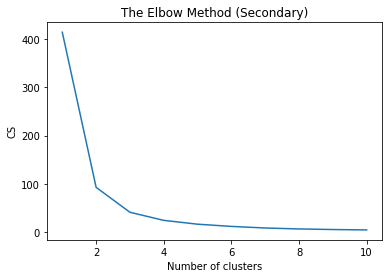

In [43]:
#Elbow method Secondary School
cs = []
X_second = X_cluster.loc[:,'Secondary School Enrollment'].values
X_second = np.reshape(X_second, (-1,1))
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_second)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method (Secondary)')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [44]:
# Actual Clustering Secondary School
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(X_second)
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

y_kmeans_second = kmeans.fit_predict(X_second)

Result: 1646 out of 7452 samples were correctly labeled.
Accuracy score: 0.22


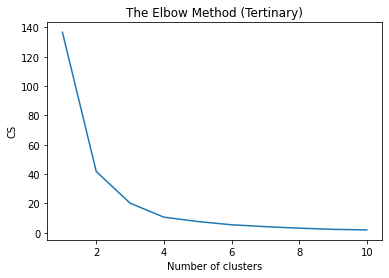

In [45]:
#Elbow method Tertinary School
cs = []
X_third = X_cluster.loc[:,'Tertinary School Enrollment'].values
X_third = np.reshape(X_third, (-1,1))
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_third)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method (Tertinary)')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [46]:
# Actual Clustering Tertinary School
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(X_third)
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

y_kmeans_third = kmeans.fit_predict(X_third)

Result: 3304 out of 7452 samples were correctly labeled.
Accuracy score: 0.44
